In [0]:
from fastai import *
from fastai.vision import *
import numpy as np

In [0]:
classes = ['Teddies', 'Black', 'Grizzly']

In [0]:
download_images('teddies_url.txt', 'Teddies', max_pics=200)

In [0]:
download_images('black_url.txt', 'Black', max_pics=200)

In [0]:
download_images('grizzly_url.txt', 'Grizzly', max_pics=200)

In [0]:
verify_images('Teddies', delete=True, max_size=500)

In [0]:
verify_images('Black', delete=True, max_size=500)

In [0]:
verify_images('Grizzly', delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder('bears', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['Black', 'Grizzly', 'Teddies']

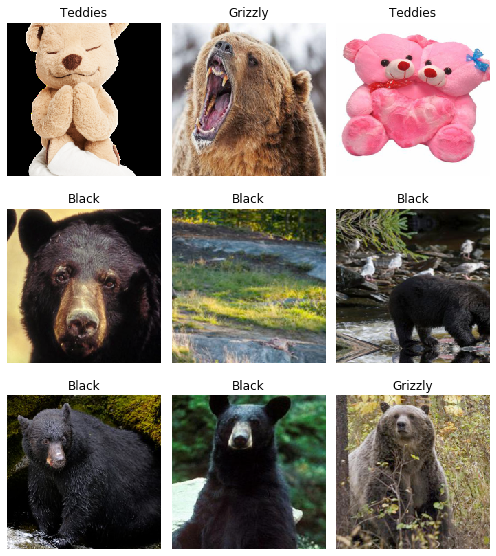

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Black', 'Grizzly', 'Teddies'], 3, 422, 105)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.268299,0.161974,0.047619,00:20
1,0.679296,0.280745,0.038095,00:20
2,0.458271,0.292022,0.047619,00:20
3,0.376928,0.269953,0.057143,00:20


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


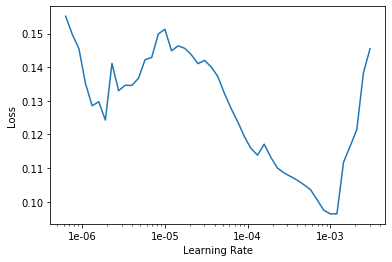

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.163349,0.350665,0.047619,00:21
1,0.098608,0.360884,0.057143,00:21


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (422 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Black,Black,Black,Black,Black
Path: bears;

Valid: LabelList (105 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Grizzly,Teddies,Black,Grizzly,Black
Path: bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_st

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

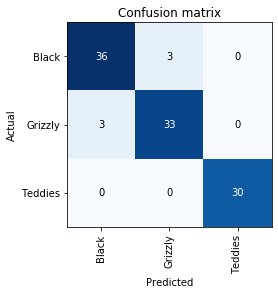

In [0]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [0]:
ImageCleaner(ds, idxs, 'bears')

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn)

Getting activations...


Computing similarities...


In [0]:
ImageCleaner(ds, idxs, 'bears', duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [0]:
db = (ImageList.from_folder('bears')
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

In [0]:
learn_cln.load('stage-2');

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

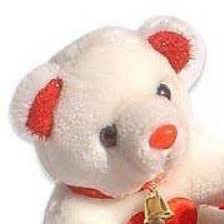

In [0]:
img = open_image('img.jfif')
img

In [0]:
learn = load_learner('bears')

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Teddies